# Mini-Project 2 Part 1 & Part 2 Notebook
## *COMP551 Mini-Project Group 14*
# Part 1: Gradient Descent Experiments

In [15]:
# Ignoring overflow warnings
import warnings
warnings.filterwarnings('ignore')

# Importing Standard Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

# Importing Logistic Regression class
import logisticregression as lr

#Importing sklearn tools for text classification
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Importing diabetes csv data
train = pd.read_csv('../../data/diabetes/diabetes_train.csv')
test = pd.read_csv('../../data/diabetes/diabetes_test.csv')
valid = pd.read_csv('../../data/diabetes/diabetes_val.csv')
all_data = pd.concat([train, test, valid], axis=0)

## Part 1.1: optimizing the maximum iterations and learning rate parameters for the data

In [4]:
def optimize(data, max_iter, learning_rate, pred_data,e=9.5e-3, momentum = 0):
    """
    Optimize a logisitic regression model's weights using gradient descent.
    This function makes it easier to test different combinations of the
    maximum iterations and learning rate parameters. 
    data:           [pd.DataFrame]  Training or Training+Validation data
    max_iter:       [int]           Maximum Iterations of gradient descent
    learning_rate:  [float]
    pred_data:      [pd.DataFrame]
    returns array of class probabilities
    """
    # preformance metric
    totAcc = []
    
    # Input data, features and binary labels column
    Xin = data.drop('Outcome',axis=1).to_numpy()
    Yin = data['Outcome'].to_numpy()
    # Data to run prediction on
    Xp = pred_data.drop('Outcome',axis=1).to_numpy()
    Yp = pred_data['Outcome'].to_numpy().ravel()
    
    # Iterate through the input parameters
    for l in learning_rate:
        for m in max_iter:
            prediction = []
            temp = []
            
            print(f'\n LEARNING RATE: {l}')
            model = lr.LogisticRegression(verbose=True, add_bias=True, learning_rate=l, max_iters=m,epsilon=e,momentum = momentum)
            yh = model.fit(Xin,Yin).predict(Xp)
            temp.append(yh)
        
            # Decision Boundary
            for x in np.array(temp).ravel():
                if x < 0.5: prediction.append(0)
                else: prediction.append(1)
                    
            Acc = accuracy_score(Yp,np.array(prediction).ravel())
            totAcc.append(Acc)
            print("Accuracy Score:", Acc)
    
    print(f'Maximum Test Accuracy achieved: {max(totAcc)} for the combination {learning_rate} and {max_iter}')
    return (max(totAcc),max_iter)

In [7]:
# Highest scoring result on test set and validation set
m = [1e6, 5e6]
l = [2e-4,9e-5]

print("RESULTS ON TEST SET: \n")
optimize(data=train, max_iter=m, learning_rate=l, pred_data=test)

print("RESULTS ON VALIDATION SET: \n")
optimize(data=train, max_iter=m, learning_rate=l, pred_data=valid)

RESULTS ON TEST SET: 


 LEARNING RATE: 0.0002
Convergence: 1000000 Iterations
Norm of gradient: 0.013429351710347743
Accuracy Score: 0.7794117647058824

 LEARNING RATE: 0.0002
Convergence: 1435477 Iterations
Norm of gradient: 0.009499996006660703
Accuracy Score: 0.7647058823529411

 LEARNING RATE: 9e-05
Convergence: 1000000 Iterations
Norm of gradient: 0.02240316722698497
Accuracy Score: 0.7352941176470589

 LEARNING RATE: 9e-05
Convergence: 3189948 Iterations
Norm of gradient: 0.009499997492933678
Accuracy Score: 0.7647058823529411
Maximum Test Accuracy achieved: 0.7794117647058824 for the combination [0.0002, 9e-05] and [1000000.0, 5000000.0]
RESULTS ON VALIDATION SET: 


 LEARNING RATE: 0.0002
Convergence: 1000000 Iterations
Norm of gradient: 0.013429351710347743
Accuracy Score: 0.77

 LEARNING RATE: 0.0002
Convergence: 1435477 Iterations
Norm of gradient: 0.009499996006660703
Accuracy Score: 0.75

 LEARNING RATE: 9e-05
Convergence: 1000000 Iterations
Norm of gradient: 0.0224031672

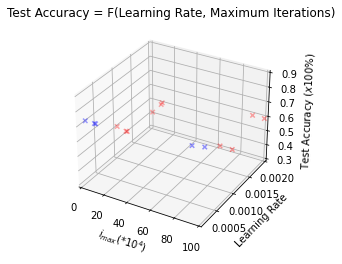

In [4]:
# Plot for test accuracy as a function of learning rates and maximum iterations

ax = plt.axes(projection='3d', title="Test Accuracy = F(Learning Rate, Maximum Iterations)")

m =   [1,1,1,
       9,9,9,
       10,10,10,
       90,90,90,
       100,100,100,
       900,900,900]

l =   [1e-3,2e-3,2e-4,
       1e-3,2e-3,2e-4,
       1e-3,2e-3,2e-4,
       1e-3,2e-3,2e-4,
       1e-3,2e-3,2e-4,
       1e-3,2e-3,2e-4]

acc = [0.5147058823529411, 0.4117647058823529, 0.7205882352941176,
       0.5, 0.4852941176470588, 0.7205882352941176,
       0.5, 0.5, 0.7205882352941176,
       0.5882352941176471, 0.5882352941176471, 0.7647058823529411,
       0.5882352941176471, 0.5882352941176471, 0.7794117647058824,
       0.6176470588235294, 0.6176470588235294, 0.75
       ]

ax.text(0,0,10,"Red points accuracy < 0.6, Blue points accuracy > 0.6",fontsize=15)


ax.set_xlabel('$i_{max}(*10^{4}$)')
ax.set_ylabel('Learning Rate')
ax.set_zlabel('Test Accuracy ($x100\%$)')

ax.set(xlim=(0, 100), ylim=(0.0001, 0.002), zlim=(0.3,0.9))

# Boundary for accuracies
color = []
for x in acc:
    if x < 0.62: color.append('r')
    else: color.append('b')

ax.scatter(m, l, acc, marker='x', c=color)

## Part 1.1 Results

* Our base model preformed better than the Sklearn SGD logisitic classifier with a margin greater than 10%

* Decision Boundary is set at X=0.5: $$P(y=1|X) < 0.5 \rightarrow \hat{y}=0$$ $$P(y=1|X) \geq 0.5 \rightarrow \hat{y}= 1$$ 


* Best accuracy achieved on the test set was 77.9%, validation set with 77% at $\alpha = 2 * 10^{-4}$ and $i_{max} = 1 * 10^6$

* Output:

```
VALIDATION SET:

LEARNING RATE: 0.0002
1000000 Iterations
Norm of gradient: 0.013429351710347736
Accuracy Score: 0.77

TEST SET:

LEARNING RATE: 0.0002
1000000 Iterations
Norm of gradient: 0.013429351710347736
Accuracy Score: 0.7794117647058824

```

## Part 1.2 Mini-Batch Stochastic Gradient Descent & Convergence Rate

### Convergence Conditions
* For the purposes of this project and from observing the past results, convergence was determined to be the conditions where accuracy was maximized and the norm of the gradient minimized (or approaching zero steadily)
* There is some tolerance we found which was $\epsilon = 9.5*10^{-3}$
* At this particular epsilon, accuracy was maximized, but after it, overfitting started to take place even though the norm of the gradient was still approaching zero

In [5]:
def BatchData(data: pd.DataFrame, size: int):
    """
    Splits the data into specific batches. Allows user to batch by features and labels
    or batch the entire dataset. Also, allows the user to have a certain number of batches
    and not batch the entire data set.
    
    data:     [pd.DataFrame]  This is the training data as input
    size:     [int]           Size of batches in units of data points
    b:        [int]           Indicates how many batches of the data will be returned
    with_num: [bool]          Lets user decide how many batches it should generate
    
    returns batched data
    """
    X = data.drop('Outcome', axis=1)
    Y = data['Outcome']
        
    # Iterate through data and split it based on batch size and number of batches needed
    # Function can handle iterating through the entire dataset or for certain number of batches
    for x in range(0, len(data), size):
        yield data[x : min(x + size, len(data))]

In [6]:
def miniBatchGD(data, BatchSize, epochs=1, All_data=True, NumBatches=0, momentum = 0)->None:
    """
    Run gradient descent optimization in mini-batches
    
    data:       [pd.DataFrame]  Input data
    BatchSize:  [int]           Size of mini-batch
    epoch:      [int]           Number of iterations over the batches
    NumBatches: [int]           How many batches it should generate
    All_data:   [bool]          If the user wants to batch the entire dataset
    
    returns weights and accuracy on testing set with mini-batch
    
    """
    allACC = []
    if All_data:
        for epoch in range(1, epochs+1):
            # Randomly shuffle the data to maximize preformance metrics
            data = data.sample(frac=1)
            print(f'Epoch: {epoch}')
            for batch in BatchData(data, BatchSize):
                #optimize(data=batch, max_iter=[1e6], learning_rate=[2e-3], pred_data=valid, momentum = momentum)
                allACC.append(optimize(data=batch, max_iter=[5e6], learning_rate=[2e-4], pred_data=valid, e=1.3e-2))
    print(max(allACC))
    return (max(allACC))

In [15]:
for i in [32,64,128,256]:
    print(f"---------------------------------------BATCH SIZE {i}---------------------------------------------------------------")
    miniBatchGD(data=train, BatchSize=i, epochs=2)

---------------------------------------BATCH SIZE 32---------------------------------------------------------------
Epoch: 1

 LEARNING RATE: 0.002
Convergence: 5000000 Iterations
Norm of gradient: 9.688429299925224
Accuracy Score: 0.56
Maximum Test Accuracy achieved: 0.56 for the combination [0.002] and [5000000.0]

 LEARNING RATE: 0.002
Convergence: 5000000 Iterations
Norm of gradient: 26.36586446960623
Accuracy Score: 0.73
Maximum Test Accuracy achieved: 0.73 for the combination [0.002] and [5000000.0]

 LEARNING RATE: 0.002
Convergence: 5000000 Iterations
Norm of gradient: 51.99216806482647
Accuracy Score: 0.64
Maximum Test Accuracy achieved: 0.64 for the combination [0.002] and [5000000.0]

 LEARNING RATE: 0.002
Convergence: 5000000 Iterations
Norm of gradient: 56.533612686924954
Accuracy Score: 0.57
Maximum Test Accuracy achieved: 0.57 for the combination [0.002] and [5000000.0]

 LEARNING RATE: 0.002
Convergence: 317984 Iterations
Norm of gradient: 0.01298297980090815
Accuracy S

Convergence: 5000000 Iterations
Norm of gradient: 39.35807059456916
Accuracy Score: 0.69
Maximum Test Accuracy achieved: 0.69 for the combination [0.002] and [5000000.0]

 LEARNING RATE: 0.002
Convergence: 5000000 Iterations
Norm of gradient: 31.853999744770327
Accuracy Score: 0.71
Maximum Test Accuracy achieved: 0.71 for the combination [0.002] and [5000000.0]

 LEARNING RATE: 0.002
Convergence: 5000000 Iterations
Norm of gradient: 54.66510275460683
Accuracy Score: 0.8
Maximum Test Accuracy achieved: 0.8 for the combination [0.002] and [5000000.0]

 LEARNING RATE: 0.002
Convergence: 5000000 Iterations
Norm of gradient: 18.4644955324698
Accuracy Score: 0.68
Maximum Test Accuracy achieved: 0.68 for the combination [0.002] and [5000000.0]

 LEARNING RATE: 0.002
Convergence: 5000000 Iterations
Norm of gradient: 18.038952240495878
Accuracy Score: 0.69
Maximum Test Accuracy achieved: 0.69 for the combination [0.002] and [5000000.0]

 LEARNING RATE: 0.002
Convergence: 5000000 Iterations
Norm

## Part 1.2 Results

Fastest convergence per size:

   - size 32 ->  76,263  Iterations
   - size 64 ->  376,771 Iterations
   - size 128->  2,443,640 Iterations
   - size 256->  5e6    Iterations
   
Highest Accuracy per size:

   - size 32 ->  0.78
   - size 64 ->  0.80
   - size 128->  0.75
   - size 256->  0.75

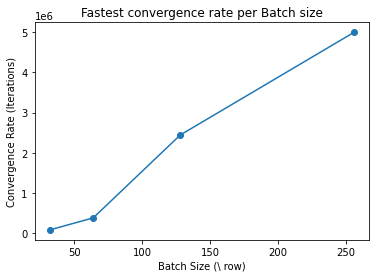

In [9]:
sizes = [32,64,128,256]
Tacc = [0.78,0.80,0.75,0.75]
Conv = [76.3e3, 376.8e3, 2.44e6, 5e6]

plt.plot(sizes,Conv, marker='o')
plt.xlabel("Batch Size (\ row)")
plt.ylabel("Convergence Rate (Iterations)")
plt.title("Fastest convergence rate per Batch size")
plt.show()

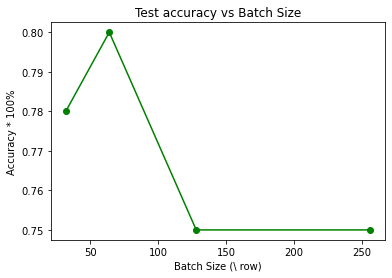

In [11]:
plt.plot(sizes,Tacc, 'g' , marker='o',label='Test Accuracy')
plt.xlabel("Batch Size (\ row)")
plt.ylabel("Accuracy * 100%")
plt.title("Test accuracy vs Batch Size")
plt.show()

# Part 1.3: Momentum

In [ ]:
# Best set of parameters so far:
m = [5e6]
l = [2e-3]
mom = []
accM = []
iterM = []


for i in np.arange(0,1,0.1):
    print("Momentum value: " + str(i))
    mom.append(i)
    print("-----------------------------------------------------------------------------------")
    (accuracy, iterations) = optimize(data=train, max_iter=m, learning_rate=l, pred_data=test, momentum = i)
    accM.append(accuracy)
    iterM.append(iterations)

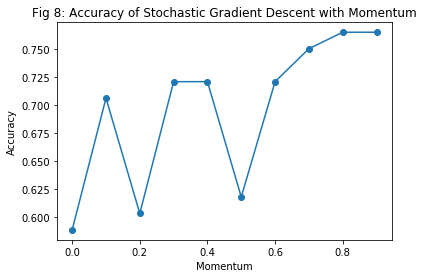

In [50]:
mom = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
accM = [0.5882352941176471, 0.7058823529411765, 0.6029411764705882, 0.7205882352941176, 0.7205882352941176, 0.6176470588235294, 0.7205882352941176, 0.75, 0.7647058823529411, 0.7647058823529411]
plt.plot(mom,accM, marker='o')
plt.xlabel("Momentum")
plt.ylabel("Accuracy")
plt.title("Fig 8: Accuracy of Stochastic Gradient Descent with Momentum")
plt.show()


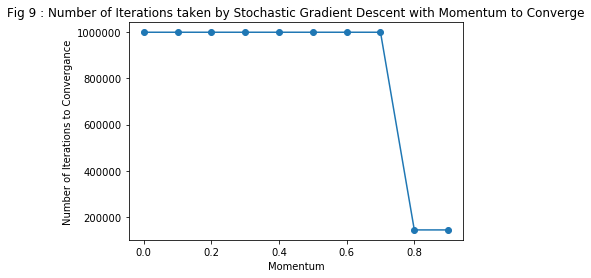

In [51]:
iterM = [1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,143548 ,143548 ]
plt.plot(mom,iterM, marker='o')
plt.xlabel("Momentum")
plt.ylabel("Number of Iterations to Convergance")
plt.title("Fig 9 : Number of Iterations taken by Stochastic Gradient Descent with Momentum to Converge")
plt.show()

# Part 1.4

In [35]:
# Best set of parameters so far:
l=[2e-4]
m = [1e6]
l = [2e-3]
mom = []
accM256 = []
iterM256 = []


for i in np.arange(0,1,0.2):
    print("Momentum value: " + str(i))
    mom.append(i)
    print("\n-----------------------------------------------------------------------------------")
    print("Batch Size: 256")
    print("----------------------------------------------------------------------------------- \n")
    res = miniBatchGD(data=train, BatchSize=256, epochs=2, momentum = i)
    accM256.append(res)

Momentum value: 0.0

-----------------------------------------------------------------------------------
Batch Size: 256
----------------------------------------------------------------------------------- 

Epoch: 1

 LEARNING RATE: 0.0002
Convergence: 1000000 Iterations
Norm of gradient: 0.015003232046243544
Accuracy Score: 0.74
Maximum Test Accuracy achieved: 0.74 for the combination [0.0002] and [1000000.0]

 LEARNING RATE: 0.0002
Convergence: 1193109 Iterations
Norm of gradient: 0.012999993678524733
Accuracy Score: 0.74
Maximum Test Accuracy achieved: 0.74 for the combination [0.0002] and [5000000.0]

 LEARNING RATE: 0.0002
Convergence: 1000000 Iterations
Norm of gradient: 0.011894648209099653
Accuracy Score: 0.73
Maximum Test Accuracy achieved: 0.73 for the combination [0.0002] and [1000000.0]

 LEARNING RATE: 0.0002
Convergence: 893627 Iterations
Norm of gradient: 0.01299999500274926
Accuracy Score: 0.73
Maximum Test Accuracy achieved: 0.73 for the combination [0.0002] and [50000

Convergence: 1133858 Iterations
Norm of gradient: 0.01299999625248819
Accuracy Score: 0.75
Maximum Test Accuracy achieved: 0.75 for the combination [0.0002] and [5000000.0]

 LEARNING RATE: 0.0002
Convergence: 1000000 Iterations
Norm of gradient: 0.012920489671902218
Accuracy Score: 0.75
Maximum Test Accuracy achieved: 0.75 for the combination [0.0002] and [1000000.0]

 LEARNING RATE: 0.0002
Convergence: 992652 Iterations
Norm of gradient: 0.012999991505956206
Accuracy Score: 0.75
Maximum Test Accuracy achieved: 0.75 for the combination [0.0002] and [5000000.0]

 LEARNING RATE: 0.0002
Convergence: 1000000 Iterations
Norm of gradient: 0.011959457836317376
Accuracy Score: 0.73
Maximum Test Accuracy achieved: 0.73 for the combination [0.0002] and [1000000.0]

 LEARNING RATE: 0.0002
Convergence: 877036 Iterations
Norm of gradient: 0.012999999176461626
Accuracy Score: 0.73
Maximum Test Accuracy achieved: 0.73 for the combination [0.0002] and [5000000.0]
Epoch: 2

 LEARNING RATE: 0.0002
Conv

In [36]:
# Best set of parameters so far:
# Best set of parameters so far:
l=[2e-4]
m = [1e6]
l = [2e-3]
#mom = []
accM32 = []
iterM32 = []


for i in np.arange(0,1,0.2):
    print("Momentum value: " + str(i))
    #mom.append(i)
    print("\n-----------------------------------------------------------------------------------")
    print("Batch Size: 32")
    print("----------------------------------------------------------------------------------- \n")
    res = miniBatchGD(data=train, BatchSize=32, epochs=2, momentum = i)
    accM256.append(res)

Momentum value: 0.0

-----------------------------------------------------------------------------------
Batch Size: 32
----------------------------------------------------------------------------------- 

Epoch: 1

 LEARNING RATE: 0.0002
Convergence: 1000000 Iterations
Norm of gradient: 0.013627835082269951
Accuracy Score: 0.71
Maximum Test Accuracy achieved: 0.71 for the combination [0.0002] and [1000000.0]

 LEARNING RATE: 0.0002
Convergence: 1050378 Iterations
Norm of gradient: 0.012999994859968072
Accuracy Score: 0.71
Maximum Test Accuracy achieved: 0.71 for the combination [0.0002] and [5000000.0]

 LEARNING RATE: 0.0002
Convergence: 1000000 Iterations
Norm of gradient: 0.0144374981723099
Accuracy Score: 0.61
Maximum Test Accuracy achieved: 0.61 for the combination [0.0002] and [1000000.0]

 LEARNING RATE: 0.0002
Convergence: 1172570 Iterations
Norm of gradient: 0.012999999230477581
Accuracy Score: 0.61
Maximum Test Accuracy achieved: 0.61 for the combination [0.0002] and [500000

Convergence: 288947 Iterations
Norm of gradient: 0.012999984928031763
Accuracy Score: 0.62
Maximum Test Accuracy achieved: 0.62 for the combination [0.0002] and [5000000.0]

 LEARNING RATE: 0.0002
Convergence: 1000000 Iterations
Norm of gradient: 0.02035829519713397
Accuracy Score: 0.67
Maximum Test Accuracy achieved: 0.67 for the combination [0.0002] and [1000000.0]

 LEARNING RATE: 0.0002
Convergence: 2081557 Iterations
Norm of gradient: 0.012999997601507038
Accuracy Score: 0.64
Maximum Test Accuracy achieved: 0.64 for the combination [0.0002] and [5000000.0]

 LEARNING RATE: 0.0002
Convergence: 1000000 Iterations
Norm of gradient: 0.01972715380819244
Accuracy Score: 0.65
Maximum Test Accuracy achieved: 0.65 for the combination [0.0002] and [1000000.0]

 LEARNING RATE: 0.0002
Convergence: 1914380 Iterations
Norm of gradient: 0.012999997675887321
Accuracy Score: 0.66
Maximum Test Accuracy achieved: 0.66 for the combination [0.0002] and [5000000.0]

 LEARNING RATE: 0.0002
Convergence: 

Convergence: 1000000 Iterations
Norm of gradient: 0.013052577206145811
Accuracy Score: 0.6
Maximum Test Accuracy achieved: 0.6 for the combination [0.0002] and [1000000.0]

 LEARNING RATE: 0.0002
Convergence: 1011212 Iterations
Norm of gradient: 0.012999995758939266
Accuracy Score: 0.6
Maximum Test Accuracy achieved: 0.6 for the combination [0.0002] and [5000000.0]

 LEARNING RATE: 0.0002
Convergence: 1000000 Iterations
Norm of gradient: 0.019114228584937405
Accuracy Score: 0.69
Maximum Test Accuracy achieved: 0.69 for the combination [0.0002] and [1000000.0]

 LEARNING RATE: 0.0002
Convergence: 1920745 Iterations
Norm of gradient: 0.012999998576421982
Accuracy Score: 0.71
Maximum Test Accuracy achieved: 0.71 for the combination [0.0002] and [5000000.0]

 LEARNING RATE: 0.0002
Convergence: 604904 Iterations
Norm of gradient: 0.009499997139728161
Accuracy Score: 0.65
Maximum Test Accuracy achieved: 0.65 for the combination [0.0002] and [1000000.0]

 LEARNING RATE: 0.0002
Convergence: 50

Convergence: 1000000 Iterations
Norm of gradient: 0.012141183992869554
Accuracy Score: 0.58
Maximum Test Accuracy achieved: 0.58 for the combination [0.0002] and [1000000.0]

 LEARNING RATE: 0.0002
Convergence: 883715 Iterations
Norm of gradient: 0.012999999010184528
Accuracy Score: 0.58
Maximum Test Accuracy achieved: 0.58 for the combination [0.0002] and [5000000.0]

 LEARNING RATE: 0.0002
Convergence: 1000000 Iterations
Norm of gradient: 0.01894368186870425
Accuracy Score: 0.69
Maximum Test Accuracy achieved: 0.69 for the combination [0.0002] and [1000000.0]

 LEARNING RATE: 0.0002
Convergence: 2524655 Iterations
Norm of gradient: 0.012999997767314772
Accuracy Score: 0.69
Maximum Test Accuracy achieved: 0.69 for the combination [0.0002] and [5000000.0]

 LEARNING RATE: 0.0002
Convergence: 1000000 Iterations
Norm of gradient: 0.011982736569324456
Accuracy Score: 0.64
Maximum Test Accuracy achieved: 0.64 for the combination [0.0002] and [1000000.0]

 LEARNING RATE: 0.0002
Convergence:

Convergence: 1155315 Iterations
Norm of gradient: 0.012999996371034784
Accuracy Score: 0.66
Maximum Test Accuracy achieved: 0.66 for the combination [0.0002] and [5000000.0]

 LEARNING RATE: 0.0002
Convergence: 358946 Iterations
Norm of gradient: 0.009499995619071411
Accuracy Score: 0.67
Maximum Test Accuracy achieved: 0.67 for the combination [0.0002] and [1000000.0]

 LEARNING RATE: 0.0002
Convergence: 127051 Iterations
Norm of gradient: 0.012999989533633795
Accuracy Score: 0.67
Maximum Test Accuracy achieved: 0.67 for the combination [0.0002] and [5000000.0]

 LEARNING RATE: 0.0002
Convergence: 1000000 Iterations
Norm of gradient: 0.01871015775330531
Accuracy Score: 0.72
Maximum Test Accuracy achieved: 0.72 for the combination [0.0002] and [1000000.0]

 LEARNING RATE: 0.0002
Convergence: 1834664 Iterations
Norm of gradient: 0.01299999775222789
Accuracy Score: 0.71
Maximum Test Accuracy achieved: 0.71 for the combination [0.0002] and [5000000.0]

 LEARNING RATE: 0.0002
Convergence: 1

Convergence: 723392 Iterations
Norm of gradient: 0.012999996110260956
Accuracy Score: 0.68
Maximum Test Accuracy achieved: 0.68 for the combination [0.0002] and [5000000.0]

 LEARNING RATE: 0.0002
Convergence: 1000000 Iterations
Norm of gradient: 0.011819400647367308
Accuracy Score: 0.66
Maximum Test Accuracy achieved: 0.66 for the combination [0.0002] and [1000000.0]

 LEARNING RATE: 0.0002
Convergence: 803911 Iterations
Norm of gradient: 0.01299999505176919
Accuracy Score: 0.66
Maximum Test Accuracy achieved: 0.66 for the combination [0.0002] and [5000000.0]

 LEARNING RATE: 0.0002
Convergence: 1000000 Iterations
Norm of gradient: 0.011651520266546953
Accuracy Score: 0.66
Maximum Test Accuracy achieved: 0.66 for the combination [0.0002] and [1000000.0]

 LEARNING RATE: 0.0002
Convergence: 712813 Iterations
Norm of gradient: 0.012999995665177079
Accuracy Score: 0.66
Maximum Test Accuracy achieved: 0.66 for the combination [0.0002] and [5000000.0]

 LEARNING RATE: 0.0002
Convergence: 1

Convergence: 1000000 Iterations
Norm of gradient: 0.015106280115268432
Accuracy Score: 0.67
Maximum Test Accuracy achieved: 0.67 for the combination [0.0002] and [1000000.0]

 LEARNING RATE: 0.0002
Convergence: 1374826 Iterations
Norm of gradient: 0.012999999981433814
Accuracy Score: 0.71
Maximum Test Accuracy achieved: 0.71 for the combination [0.0002] and [5000000.0]

 LEARNING RATE: 0.0002
Convergence: 16598 Iterations
Norm of gradient: 0.009499362128389472
Accuracy Score: 0.57
Maximum Test Accuracy achieved: 0.57 for the combination [0.0002] and [1000000.0]

 LEARNING RATE: 0.0002
Convergence: 13610 Iterations
Norm of gradient: 0.01299937504749693
Accuracy Score: 0.57
Maximum Test Accuracy achieved: 0.57 for the combination [0.0002] and [5000000.0]

 LEARNING RATE: 0.0002
Convergence: 1000000 Iterations
Norm of gradient: 0.012333845867542576
Accuracy Score: 0.61
Maximum Test Accuracy achieved: 0.61 for the combination [0.0002] and [1000000.0]

 LEARNING RATE: 0.0002
Convergence: 77

Convergence: 1000000 Iterations
Norm of gradient: 0.02162685855601909
Accuracy Score: 0.7
Maximum Test Accuracy achieved: 0.7 for the combination [0.0002] and [1000000.0]

 LEARNING RATE: 0.0002
Convergence: 2414946 Iterations
Norm of gradient: 0.012999996728710703
Accuracy Score: 0.72
Maximum Test Accuracy achieved: 0.72 for the combination [0.0002] and [5000000.0]

 LEARNING RATE: 0.0002
Convergence: 1000000 Iterations
Norm of gradient: 0.01887796459222964
Accuracy Score: 0.66
Maximum Test Accuracy achieved: 0.66 for the combination [0.0002] and [1000000.0]

 LEARNING RATE: 0.0002
Convergence: 1965388 Iterations
Norm of gradient: 0.012999999595342818
Accuracy Score: 0.74
Maximum Test Accuracy achieved: 0.74 for the combination [0.0002] and [5000000.0]

 LEARNING RATE: 0.0002
Convergence: 1000000 Iterations
Norm of gradient: 0.014451382619576444
Accuracy Score: 0.62
Maximum Test Accuracy achieved: 0.62 for the combination [0.0002] and [1000000.0]

 LEARNING RATE: 0.0002
Convergence: 1

Convergence: 781948 Iterations
Norm of gradient: 0.012999992504751071
Accuracy Score: 0.67
Maximum Test Accuracy achieved: 0.67 for the combination [0.0002] and [5000000.0]

 LEARNING RATE: 0.0002
Convergence: 1000000 Iterations
Norm of gradient: 0.016166605754342925
Accuracy Score: 0.71
Maximum Test Accuracy achieved: 0.71 for the combination [0.0002] and [1000000.0]

 LEARNING RATE: 0.0002
Convergence: 1708562 Iterations
Norm of gradient: 0.012999998010197297
Accuracy Score: 0.72
Maximum Test Accuracy achieved: 0.72 for the combination [0.0002] and [5000000.0]

 LEARNING RATE: 0.0002
Convergence: 1000000 Iterations
Norm of gradient: 0.01315066875693105
Accuracy Score: 0.69
Maximum Test Accuracy achieved: 0.69 for the combination [0.0002] and [1000000.0]

 LEARNING RATE: 0.0002
Convergence: 1024814 Iterations
Norm of gradient: 0.012999997603388174
Accuracy Score: 0.69
Maximum Test Accuracy achieved: 0.69 for the combination [0.0002] and [5000000.0]

 LEARNING RATE: 0.0002
Convergence:

Convergence: 1659963 Iterations
Norm of gradient: 0.012999999320883025
Accuracy Score: 0.7
Maximum Test Accuracy achieved: 0.7 for the combination [0.0002] and [5000000.0]

 LEARNING RATE: 0.0002
Convergence: 1000000 Iterations
Norm of gradient: 0.013176279882687401
Accuracy Score: 0.65
Maximum Test Accuracy achieved: 0.65 for the combination [0.0002] and [1000000.0]

 LEARNING RATE: 0.0002
Convergence: 1040078 Iterations
Norm of gradient: 0.012999997986151566
Accuracy Score: 0.65
Maximum Test Accuracy achieved: 0.65 for the combination [0.0002] and [5000000.0]

 LEARNING RATE: 0.0002
Convergence: 1000000 Iterations
Norm of gradient: 0.012396367757926484
Accuracy Score: 0.58
Maximum Test Accuracy achieved: 0.58 for the combination [0.0002] and [1000000.0]

 LEARNING RATE: 0.0002
Convergence: 920417 Iterations
Norm of gradient: 0.012999992738739662
Accuracy Score: 0.58
Maximum Test Accuracy achieved: 0.58 for the combination [0.0002] and [5000000.0]

 LEARNING RATE: 0.0002
Convergence: 

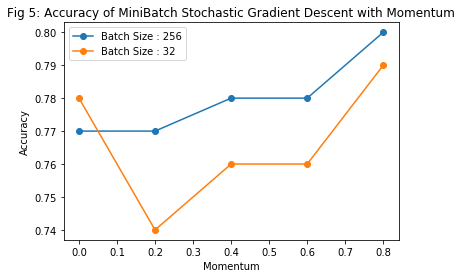

In [16]:
mom = [0,0.2,0.4,0.6,0.8]
accM256 = [0.77,0.77,0.78,0.78,0.8]
accM32 = [0.78,0.74,0.76,0.76,0.79]
plt.plot(mom,accM256, marker='o', label = "Batch Size : 256")
plt.plot(mom,accM32, marker='o', label = "Batch Size : 32")
plt.xlabel("Momentum")
plt.ylabel("Accuracy")
plt.title("Fig 5: Accuracy of MiniBatch Stochastic Gradient Descent with Momentum")
plt.legend()
plt.show()

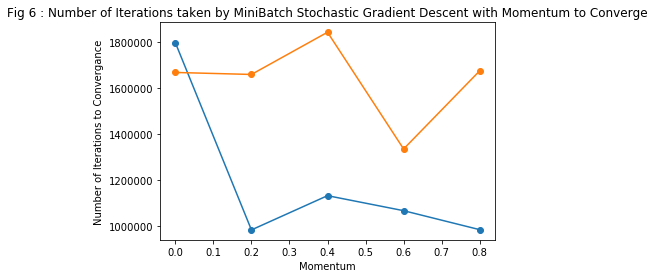

In [17]:
mom = [0,0.2,0.4,0.6,0.8]
iterM256 = [1796424 ,982345 , 1131215, 1065961, 983424]
iterM32 = [1666771, 1658079, 1841562,1334187,1673849]

plt.plot(mom,iterM256, marker='o', label = "Batch Size : 256")
plt.plot(mom,iterM32, marker='o', label = "Batch Size : 32")
plt.xlabel("Momentum")
plt.ylabel("Number of Iterations to Convergance")
plt.title("Fig 6 : Number of Iterations taken by MiniBatch Stochastic Gradient Descent with Momentum to Converge")
plt.legend()
plt.show()

For Fully Batched Data, the best accuracy achieved was 76.5% with a momentum value of 0.8
For Smallest Batch Size of 16, the best accuracy achieved was 79% for momentum of 0.8
For Largets Batch Size of 256, the best accuracy achieved was 80% for momentum of 0.6


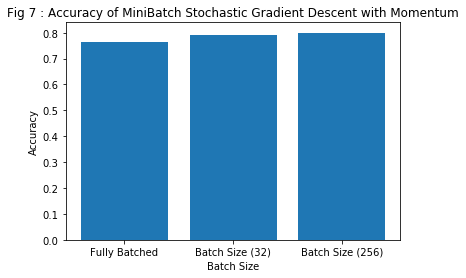

* The most effective setting is a large batch size of 256


In [18]:
print("For Fully Batched Data, the best accuracy achieved was 76.5% with a momentum value of 0.8")
print("For Smallest Batch Size of 16, the best accuracy achieved was 79% for momentum of 0.8")
print("For Largets Batch Size of 256, the best accuracy achieved was 80% for momentum of 0.6")
x_axis = ["Fully Batched", "Batch Size (32)", "Batch Size (256)"]
y_axis = [0.765, 0.79,0.8]
plt.bar(x_axis,y_axis)
plt.xlabel("Batch Size")
plt.ylabel("Accuracy")
plt.title("Fig 7 : Accuracy of MiniBatch Stochastic Gradient Descent with Momentum")
plt.show()

print("* The most effective setting is a large batch size of 256")

# Part 2: Text Classification with Fake News Dataset

In [16]:
fake_news_training = pd.read_csv('../../data/fake_news/fake_news_train.csv')
fake_news_validation = pd.read_csv('../../data/fake_news/fake_news_val.csv')
fake_news_test = pd.read_csv('../../data/fake_news/fake_news_test.csv')


### Base case

In [17]:
vectorizer = CountVectorizer()

vectorizer.fit(fake_news_training['text'])
training_features = vectorizer.transform(fake_news_training['text'])
validation_features = vectorizer.transform(fake_news_validation['text'])

# Model Training
clf = LogisticRegression(max_iter=1000, C=4.25e-02)
clf.fit(training_features, fake_news_training['label'])

# Model Prediction
y_pred = clf.predict(validation_features)
y_true = fake_news_validation['label']

accuracy = metrics.accuracy_score(y_true, y_pred)

print(f'base accuracy of model on validation set: {accuracy}')

base accuracy of model on validation set: 0.755


### Preprocessing

In NLP questions, preprocessing decision for data are extremely important.
For the following problem the different preprocessing decisions that were explored were:

* n-grams
* stopword removal
* token selection

The CountVectorizer below has been set with the values that we determined for the model through training.

### Hyper parameter training

Once a solid set of preprocessign results with a good general model were
constructed, the model had to be trained on certain hyperpramateres.

* the value of C
* minimum document frequency
* maximum document frequency
* maximum number of features

On further training it was noted that min_df value did not really matter as only the top 300,000 features were
being used.

In [18]:
# The final model

# Feature Extraction
vectorizer = CountVectorizer(ngram_range=(1, 2), token_pattern=r"\b[^\d\W]+\b|\b[0-9]+\b", min_df=3, max_features=300000)
vectorizer.fit(fake_news_training['text'])
training_features = vectorizer.transform(fake_news_training['text'])
validation_features = vectorizer.transform(fake_news_validation['text'])

# Model Training
clf = LogisticRegression(max_iter=1000, C=4.25e-02)
clf.fit(training_features, fake_news_training['label'])

# Model Prediction
y_pred = clf.predict(validation_features)
y_true = fake_news_validation['label']

accuracy = metrics.accuracy_score(y_true, y_pred)
confusion = metrics.confusion_matrix(y_true, y_pred)
precision = metrics.precision_score(y_true, y_pred)
recall = metrics.recall_score(y_true, y_pred)

print(f'Best model has accuracy: {accuracy}%, precision: {precision}%, and reacll: {recall}')
print("Confusion Matrix:")
print(confusion)

Best model has accuracy: 0.7865%, precision: 0.8057097541633624%, and reacll: 0.8480801335559266
Confusion Matrix:
[[ 557  245]
 [ 182 1016]]


## HyperParam testing data

The data recieved on testing the data with different hyperparameters for using LogisticRegressionCV

Note: The data below was collected through multiple tests and iterations of the code, and compiled for visualization below. 

### C values

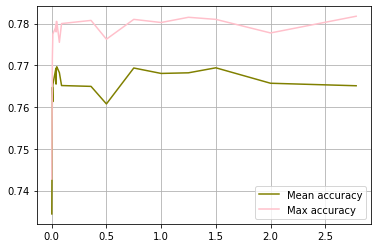

<Figure size 432x288 with 0 Axes>

In [19]:
Cs = [0.000774263683, 0.0059948425, 0.01, 0.01, 0.035, 0.0375, 0.04, 0.04, 0.0425, 0.045, 0.0464158883, 0.07, 0.09, 0.359381366, 0.5, 0.75, 1, 1.25, 1.5, 2, 2.7825594]
mean_acc_c = [0.7344, 0.76475, 0.7613, 0.76535, 0.7688, 0.76915, 0.7655, 0.766, 0.76945, 0.7695, 0.76965, 0.76825, 0.76515, 0.76495, 0.76075, 0.76935, 0.76805, 0.7682, 0.7694, 0.7657, 0.7651]
max_acc_c = [0.74275, 0.77175, 0.77675, 0.7775, 0.779, 0.77975, 0.778, 0.779, 0.7805, 0.7805, 0.7805, 0.7755, 0.78, 0.78075, 0.77625, 0.781, 0.78025, 0.7815, 0.781, 0.77775, 0.78175]
df = pd.DataFrame(list(zip(Cs, mean_acc_c, max_acc_c)), columns=["C values", "Mean accuracy", "Max accuracy"])

plt.plot('C values', 'Mean accuracy', data=df, marker='', color="olive")
plt.plot('C values', 'Max accuracy', data=df, marker='', color="pink")

plt.legend()
plt.grid()

plt.show()
plt.savefig("C-vals_complete.png")

### C values on final iteration

C value was finally picked as 0.0425

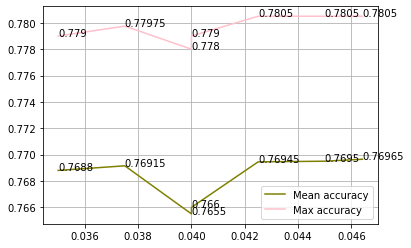

<Figure size 432x288 with 0 Axes>

In [20]:
Cs = [ 0.035, 0.0375, 0.04, 0.04, 0.0425, 0.045, 0.0464158883]
mean_acc_c = [ 0.7688, 0.76915, 0.7655, 0.766, 0.76945, 0.7695, 0.76965]
max_acc_c = [ 0.779, 0.77975, 0.778, 0.779, 0.7805, 0.7805, 0.7805]
df = pd.DataFrame(list(zip(Cs, mean_acc_c, max_acc_c)), columns=["C values", "Mean accuracy", "Max accuracy"])

plt.plot('C values', 'Mean accuracy', data=df, marker='', color="olive")
plt.plot('C values', 'Max accuracy', data=df, marker='', color="pink")

plt.legend()
plt.grid()

for i,j in zip(Cs,mean_acc_c):
    plt.annotate(str(j),xy=(i,j))

for i,j in zip(Cs,max_acc_c):
    plt.annotate(str(j),xy=(i,j))

plt.show()
plt.savefig("C-vals_final.png")

### max_feature hyperparameter tuning

Through this data we picked 300000 as our max number of features

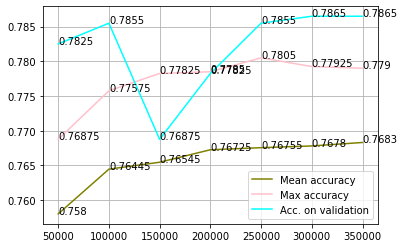

<Figure size 432x288 with 0 Axes>

In [21]:
max = [50000, 100000, 150000, 200000, 250000, 300000, 350000]
mean_acc_c = [0.758, 0.76445, 0.76545, 0.76725, 0.76755, 0.7678, 0.7683]
max_acc_c = [0.76875, 0.77575, 0.77825, 0.7785, 0.7805, 0.77925, 0.779]
validation = [0.7825, 0.7855, 0.76875, 0.77825, 0.7855, 0.7865, 0.7865]

df = pd.DataFrame(list(zip(max, mean_acc_c, max_acc_c, validation)), columns=["C values", "Mean accuracy", "Max accuracy", "Acc. on validation"])

plt.plot('C values', 'Mean accuracy', data=df, marker='', color="olive")
plt.plot('C values', 'Max accuracy', data=df, marker='', color="pink")
plt.plot('C values', 'Acc. on validation', data=df, marker='', color="cyan")

plt.legend()
plt.grid()

for i,j in zip(max,mean_acc_c):
    plt.annotate(str(j),xy=(i,j))

for i,j in zip(max,max_acc_c):
    plt.annotate(str(j),xy=(i,j))

for i,j in zip(max,validation):
    plt.annotate(str(j),xy=(i,j))

plt.show()
plt.savefig("max-feature-vals-complete.png")
